# Analysoinnin perusteet - Projektitehtävä

[Linkki repoon](https://github.com/eeturonkko/analysoinnin_perusteet_2023) tai https://github.com/eeturonkko/analysoinnin_perusteet_2023\
[Data](https://www.kaggle.com/datasets/kapturovalexander/bitcoin-and-other-14-most-significant-cryptos?select=1+Bitcoin.csv) tai https://www.kaggle.com/datasets/kapturovalexander/bitcoin-and-other-14-most-significant-cryptos?select=1+Bitcoin.csv


## Kryptovaluutta - Mitä se on?
Kryptovaluutta on digitaalinen tai virtuaalinen valuutta, joka käyttää kryptografiaa turvallisuuden varmistamiseen. Se on hajautettu ja toimii lohkoketjuteknologian periaatteella. Kryptovaluuttojen kaksi tunnetuinta esimerkkiä ovat Bitcoin ja Ethereum. Projektityössäni keskityn analysoimaan Bitcoinin ja Ethereumin hintakehitystä vuosien aikana.

## Bitcoin
- Bitcoin luotiin vuonna 2009
- Ensimmäinen lohkoketjuun perustuva kryptovaluutta ja sen tarkoitus oli luoda hajautettu, digitaalinen valuutta ilman keskuspankin hallintaa.

## Ethereum
- Ethereum kehitettiin ja julkistettiin vuonna 2015
- Ethereum käyttää lohkoketjuteknologiaa kuten Bitcoin, mutta keskeinen ero on sen kyky toteuttaa älysopimuksia (Smart contarct).

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from IPython.display import display, Markdown

# Asetetaan csv tiedostojen polut
bitcoin_file_path = "./data/1 Bitcoin.csv"
ethereum_file_path = "./data/2 Ethereum.csv"
usd_file_path = "./data/DX-Y.NYB.csv"

# Luetaan csv tiedostot ja tallennetaan ne muuttujiin bitcoin_data ja ethereum_data
bitcoin_data = pd.read_csv(bitcoin_file_path)
ethereum_data = pd.read_csv(ethereum_file_path)
usd_data = pd.read_csv(usd_file_path)

# Muutetaan "Date" sarakkeen tyyppi datetimeksi
bitcoin_data["Date"] = pd.to_datetime(bitcoin_data["Date"])
ethereum_data["Date"] = pd.to_datetime(ethereum_data["Date"])
usd_data["Date"] = pd.to_datetime(usd_data["Date"])

# Rajataan data vuosille 2023
btc_2023 = bitcoin_data[(bitcoin_data["Date"] >= "2023-01-01") & (bitcoin_data["Date"] <= "2023-12-31")]
eth_2023 = ethereum_data[(ethereum_data["Date"] >= "2023-01-01") & (ethereum_data["Date"] <= "2023-12-31")]
usd_2023 = usd_data[(usd_data["Date"] >= "2023-01-01") & (usd_data["Date"] <= "2023-12-31")]

In [257]:
# Näytä data
display(bitcoin_data.head())

# Laske rivien ja sarakkeiden määrä
print("Bitcoin data:", bitcoin_data.shape[0], "riviä ja", bitcoin_data.shape[1], "saraketta")
print("Ethereum data:", ethereum_data.shape[0], "riviä ja", ethereum_data.shape[1], "saraketta")
print("USD data:", usd_data.shape[0], "riviä ja", usd_data.shape[1], "saraketta")


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600


Bitcoin data: 3366 riviä ja 7 saraketta
Ethereum data: 2217 riviä ja 7 saraketta
USD data: 303 riviä ja 7 saraketta


Kuten näemme datasetti sisältää järjestysmääritteen eli "ordinal attribute" sarakkeen. Kyseinen sarake on "Date" ja se on järjestetty aikajärjestykseen. Tämä pätee, jos päivämäärät ovat järjestäytyneet kronologisesti ja niitä käytetään analysoinnissa järjestyksen mukaisesti. 

Datasetistä ei löydy selkeää "binary attributea" eli kahden arvon attribuuttia sekä "nominal attributea" eli nimellisarvoista attribuuttia.

In [258]:

bitcoin_data['Daily Change'] = bitcoin_data['Close'].diff()
ethereum_data['Daily Change'] = ethereum_data['Close'].diff()

bins = [-np.inf, -50, -10, 10, 50, np.inf]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Apply binning
bitcoin_data['Volatility Category'] = pd.cut(bitcoin_data['Daily Change'], bins=bins, labels=labels)
ethereum_data['Volatility Category'] = pd.cut(ethereum_data['Daily Change'], bins=bins, labels=labels)



In [259]:
# Funktiot

# Asetetaan "Date" sarakkeen indeksiksi
bitcoin_data.set_index("Date", inplace=True)
ethereum_data.set_index("Date", inplace=True)
usd_data.set_index("Date", inplace=True)
btc_2023.set_index("Date", inplace=True)
eth_2023.set_index("Date", inplace=True)
usd_2023.set_index("Date", inplace=True)

def tarkista_duplikaatit_ja_puuttuvat_arvot(data,label):
    # Duplikaatit
    duplicate_rows = data.duplicated().sum()
    print("Duplikaattien määrä ", label, duplicate_rows, "kpl")
    # Puuttuvat arvot
    missing_values_count = data.isnull().sum()
    total_cells = np.prod(data.shape)
    total_missing = missing_values_count.sum()
    per_of_missing_data = (total_missing/total_cells) * 100
    print("Puuttuvat arvot prosentteina", label, int(per_of_missing_data), "%")

def poista_duplikaatit(data):
    data.drop_duplicates(inplace=True)

def poista_puuttuvat_arvot(data):
    data.dropna(inplace=True)

def tarkista_ja_poista(data, nimi):
    # Poistetaan duplikaatit
    if data.duplicated().sum():
        poista_duplikaatit(data)
    # Poistetaan puuttuvat arvot
    if data.isnull().sum().any():
        poista_puuttuvat_arvot(data)
    # Tarkistetaan duplikaatit ja puuttuvat arvot uudelleen
    tarkista_duplikaatit_ja_puuttuvat_arvot(data, nimi)

def hintakehitys_vuosien_aikana(label, color, data, title):
    plt.figure(figsize=(50, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data["Close"], label=label, color=color)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.show()

def hintakehitys_2023(label, color, data, title):
    plt.figure(figsize=(20, 6))
    plt.plot(data['Close'], label=label, color=color)
    plt.title(title)
    plt.xlabel('Päivämäärä')
    plt.ylabel('Sulkeutumishinta (USD)')
    # Asetetaan x-akselille kuukausittaiset merkinnät
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def laske_volatiliteetti(data, bins, labels):
    #Laskee päivittäiset muutokset annetusta datasta ja lisää volatiliteettiluokat.

    data['Daily Change'] = data['Close'].diff()

    # Lisää volatiliteettiluokat
    data['Volatility Category'] = pd.cut(data['Daily Change'], bins=bins, labels=labels)

    # Laske tiheydet kullekin kategorialle
    return data['Volatility Category'].value_counts()

def volatiliteetti_2023(volatility_counts, title, color, ax):
    # Piirrä pylväsdiagrammi
    volatility_counts.sort_index().plot(kind='bar', ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlabel('Volatiliteettiluokka')
    ax.set_ylabel('Tiheys')


## Duplikaatit ja puuttuvat arvot

In [260]:
# Tarkistetaan duplikaatit ja puuttuvat arvot
tarkista_duplikaatit_ja_puuttuvat_arvot(bitcoin_data, "(BTC)")
tarkista_duplikaatit_ja_puuttuvat_arvot(ethereum_data, "(ETH)")
tarkista_duplikaatit_ja_puuttuvat_arvot(usd_data, "(USD)")

Duplikaattien määrä  (BTC) 0 kpl
Puuttuvat arvot prosentteina (BTC) 0 %
Duplikaattien määrä  (ETH) 0 kpl
Puuttuvat arvot prosentteina (ETH) 0 %
Duplikaattien määrä  (USD) 51 kpl
Puuttuvat arvot prosentteina (USD) 17 %


In [261]:
# Jos duplikaatteja tai puuttuvia arvoja on, poistetaan ne
datasets = [(bitcoin_data, "(BTC)"), (ethereum_data, "(ETH)"), (usd_data, "(USD)")]
# Käydään läpi jokainen datasetti ja suoritetaan tarkistukset
for data, nimi in datasets:
    tarkista_ja_poista(data, nimi)

Duplikaattien määrä  (BTC) 0 kpl
Puuttuvat arvot prosentteina (BTC) 0 %
Duplikaattien määrä  (ETH) 0 kpl
Puuttuvat arvot prosentteina (ETH) 0 %
Duplikaattien määrä  (USD) 0 kpl
Puuttuvat arvot prosentteina (USD) 0 %


## Bitcoinin ja Ethereumin hintakehitys vuosien aikana

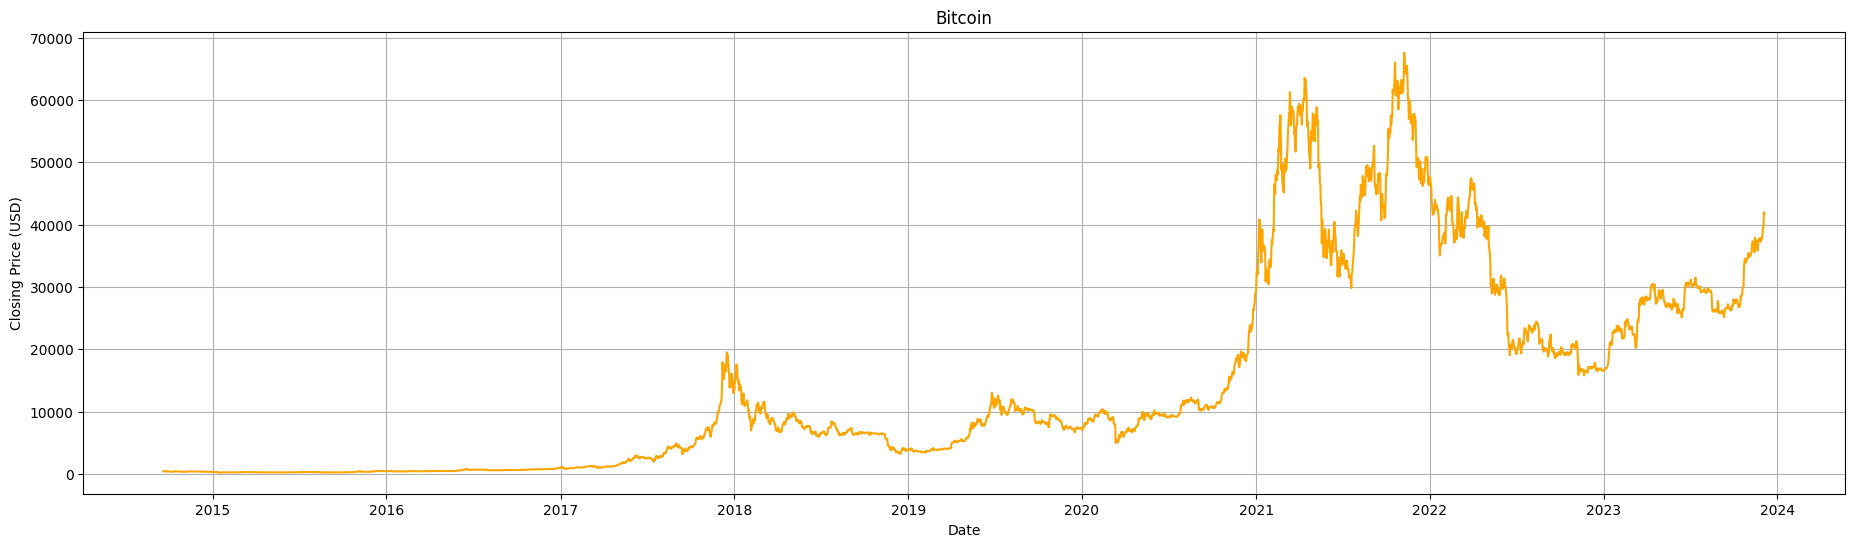

In [263]:

# Bitcoin
hintakehitys_vuosien_aikana("Bitcoin", "orange", bitcoin_data, "Bitcoin")



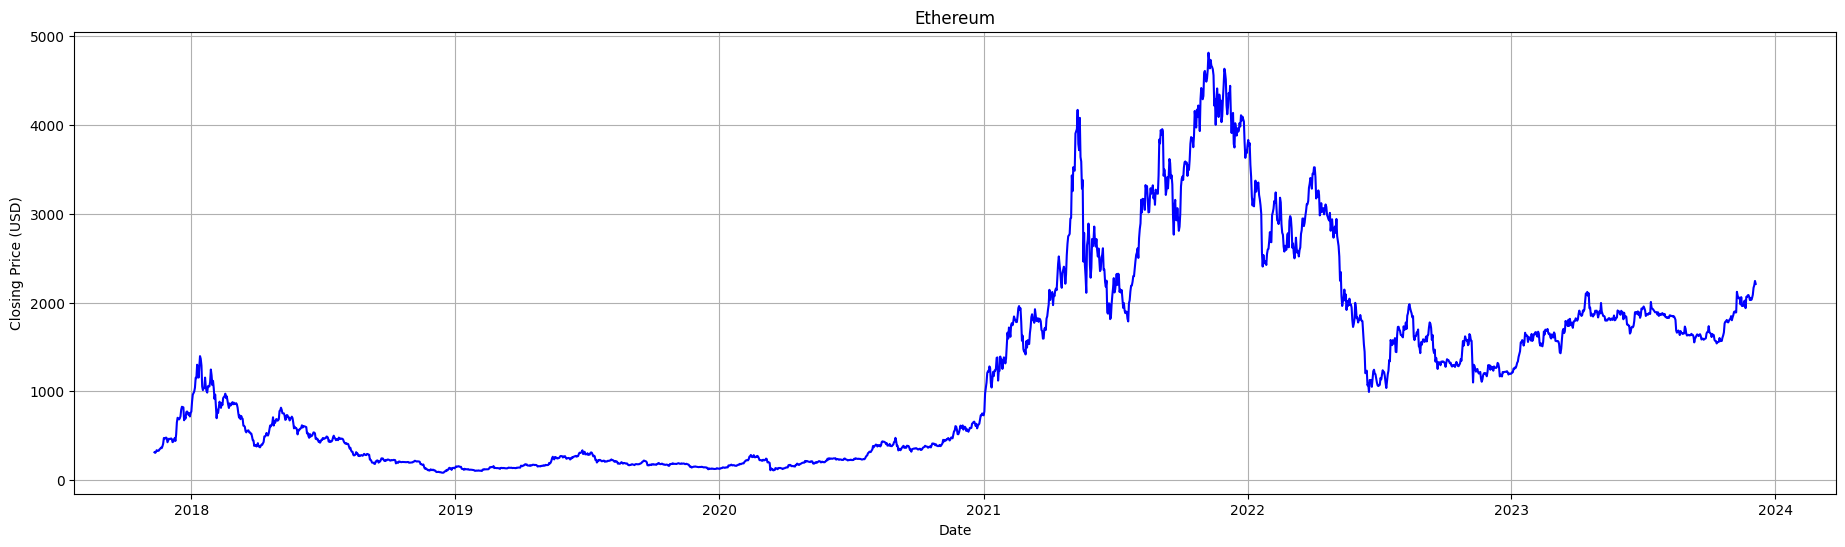

In [264]:
# Ethereum
hintakehitys_vuosien_aikana("Ethereum", "blue", ethereum_data, "Ethereum")


### Bitcoinin ja Ethereum alin ja ylin hinta vuosien aikana

In [265]:
# Bitcoin
min_close_price_btc = bitcoin_data['Close'].min()
max_close_price_btc = bitcoin_data['Close'].max()

print("Bitcoinin pienin sulkeutumishinta:", round(min_close_price_btc, 2), "USD")
print("Bitcoinin suurin sulkeutumishinta:", round(max_close_price_btc, 2), "USD")

# Ethereum
min_close_price_eth = ethereum_data['Close'].min()
max_close_price_eth = ethereum_data['Close'].max()

print("Ethereumin pienin sulkeutumishinta:", round(min_close_price_eth, 2), "USD")
print("Ethereumin suurin sulkeutumishinta:", round(max_close_price_eth, 2), "USD")


Bitcoinin pienin sulkeutumishinta: 178.1 USD
Bitcoinin suurin sulkeutumishinta: 67566.83 USD
Ethereumin pienin sulkeutumishinta: 84.31 USD
Ethereumin suurin sulkeutumishinta: 4812.09 USD


### Keskimääräinen ja mediaani volyymi vuosien aikana

Kaupankäynnin volyymi lasketaan päivittäin, ja se kertoo, kuinka paljon on käyty kauppaa päivän aikana. Keskiarvo ottaa huomioon kaikki päivittäiset volyymit tietyn ajanjakson aikana ja laskee niiden keskimääräisen arvon, kun taas mediaani löytää keskimmäisen arvon, kun kaikki päivittäiset volyymit järjestetään suuruusjärjestykseen.

In [266]:
# Bitcoin 
mean_volume_btc = bitcoin_data['Volume'].mean()
median_volume_btc = bitcoin_data['Volume'].median()

print("Bitcoinin keskimääräinen volyymi:", round(mean_volume_btc, 2))
print("Bitcoinin mediaani volyymi:", round(median_volume_btc, 2))

Bitcoinin keskimääräinen volyymi: 16511707954.01
Bitcoinin mediaani volyymi: 11090276850.0


In [267]:
# Ethereum
mean_volume_eth = ethereum_data['Volume'].mean()
median_volume_eth = ethereum_data['Volume'].median()

print("Ethereumin keskimääräinen volyymi:", round(mean_volume_eth, 2))
print("Ethereumin mediaani volyymi:", round(median_volume_eth, 2))

Ethereumin keskimääräinen volyymi: 12059075081.45
Ethereumin mediaani volyymi: 9315805225.0


## Vuoden 2023 kurssien kehitys

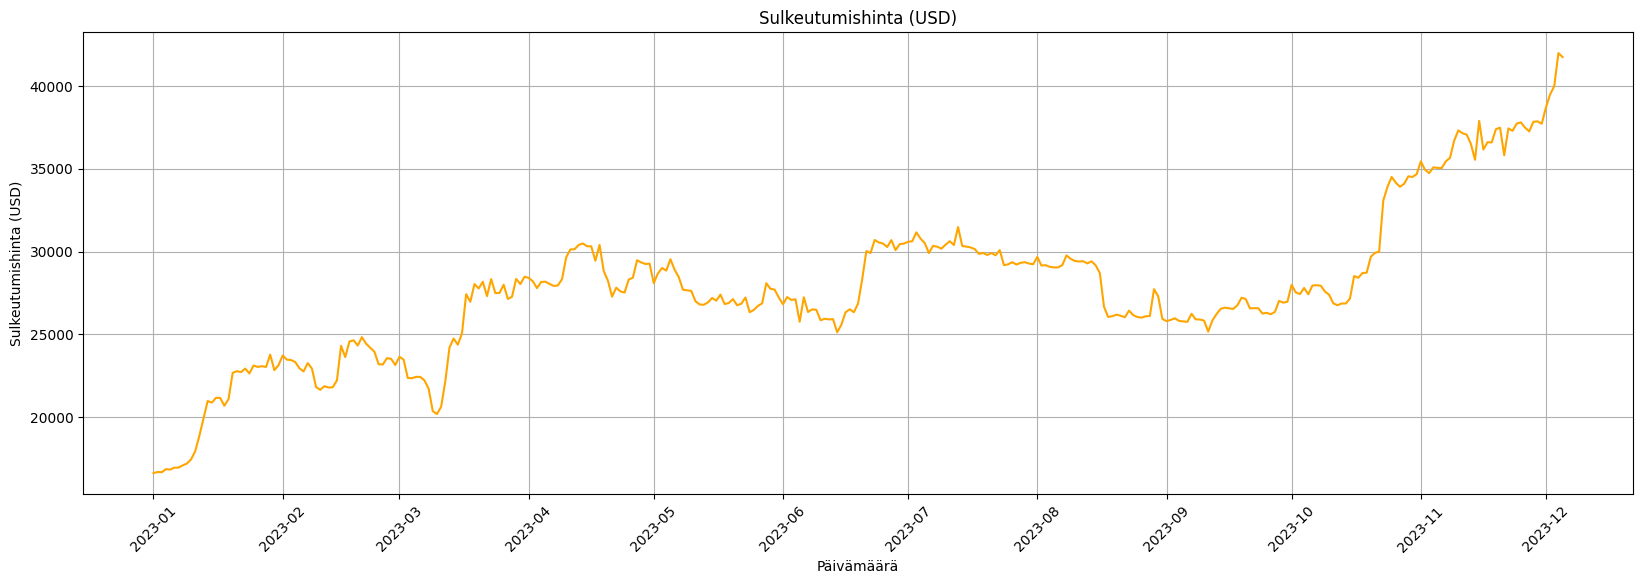

In [268]:

hintakehitys_2023("Bitcoin", "orange", btc_2023, "Sulkeutumishinta (USD)")


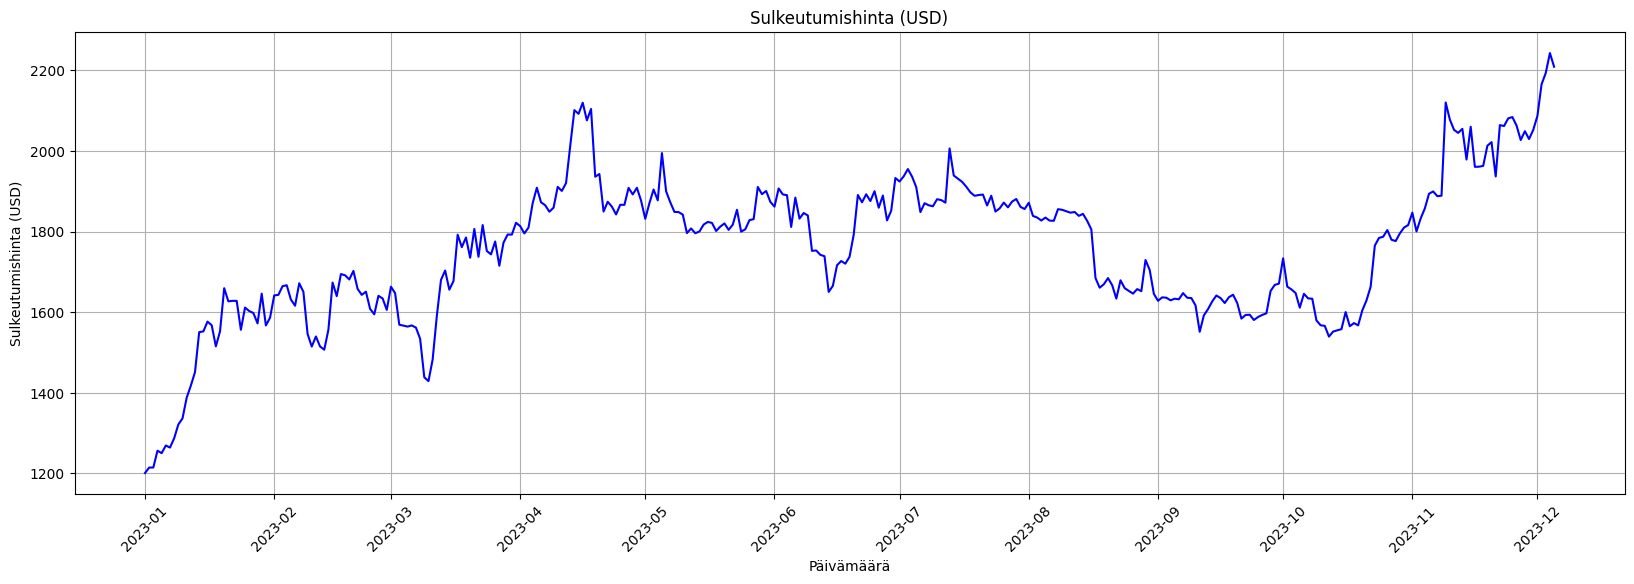

In [269]:
# ETH 2023
hintakehitys_2023("Ethereum", "blue", eth_2023, "Sulkeutumishinta (USD)")

### Bitcoinin ja Ethereumin ylin ja alin hinta vuonna 2023


In [270]:

# Bitcoin
min_close_price_btc_2023 = btc_2023['Close'].min()
max_close_price_btc_2023 = btc_2023['Close'].max()
keskiarvo_close_price_btc_2023 = btc_2023['Close'].median()

print("Bitcoinin pienin sulkeutumishinta:", round(min_close_price_btc_2023, 2), "USD")
print("Bitcoinin suurin sulkeutumishinta:", round(max_close_price_btc_2023, 2), "USD")
print("Bitcoinin keskiarvo sulkeutumishinta:", round(keskiarvo_close_price_btc_2023, 2), "USD")

Bitcoinin pienin sulkeutumishinta: 16625.08 USD
Bitcoinin suurin sulkeutumishinta: 41980.1 USD
Bitcoinin keskiarvo sulkeutumishinta: 27429.98 USD


In [271]:
# Ethereum
min_close_price_eth_2023 = eth_2023['Close'].min()
max_close_price_eth_2023 = eth_2023['Close'].max()
keskiarvo_close_price_eth_2023 = eth_2023['Close'].median()

print("Ethereumin pienin sulkeutumishinta:", round(min_close_price_eth_2023, 2), "USD")
print("Ethereumin suurin sulkeutumishinta:", round(max_close_price_eth_2023, 2), "USD")
print("Ethereumin keskiarvo sulkeutumishinta:", round(keskiarvo_close_price_eth_2023, 2), "USD")

Ethereumin pienin sulkeutumishinta: 1200.96 USD
Ethereumin suurin sulkeutumishinta: 2243.22 USD
Ethereumin keskiarvo sulkeutumishinta: 1793.0 USD


## Paljonko Bitcoinin ja Ethereumin hinta on noussut vuonna 2023 prosentuaalisesti?

In [272]:
# Lasketaan Bitcoinin hinnan prosentuaalinen muutos vuodelle 2023
start_price_btc_2023 = btc_2023["Close"].iloc[0]
end_price_btc_2023 = btc_2023["Close"].iloc[-1]
percentage_change_btc_2023 = ((end_price_btc_2023 - start_price_btc_2023) / start_price_btc_2023) * 100
pyoristetty_muutos_btc = round(percentage_change_btc_2023, 2)


# Lasketaan Ethereum hinnan prosentuaalinen muutos vuodelle 2023
start_price_eth_2023 = eth_2023["Close"].iloc[0]
end_price_eth_2023 = eth_2023["Close"].iloc[-1]
percentage_change_eth_2023 = ((end_price_eth_2023 - start_price_eth_2023) / start_price_eth_2023) * 100
pyoristetty_muutos_eth = round(percentage_change_eth_2023, 2)

markdown_text = f"""
### Bitcoinin hinta on vuonna 2023 noussut {pyoristetty_muutos_btc}%\n
### Ethereumin hinta on vuonna 2023 noussut {pyoristetty_muutos_eth}%
"""

display(Markdown(markdown_text))


### Bitcoinin hinta on vuonna 2023 noussut 151.06%

### Ethereumin hinta on vuonna 2023 noussut 83.97%


### Volatiliteetti vuoden 2023 aikana

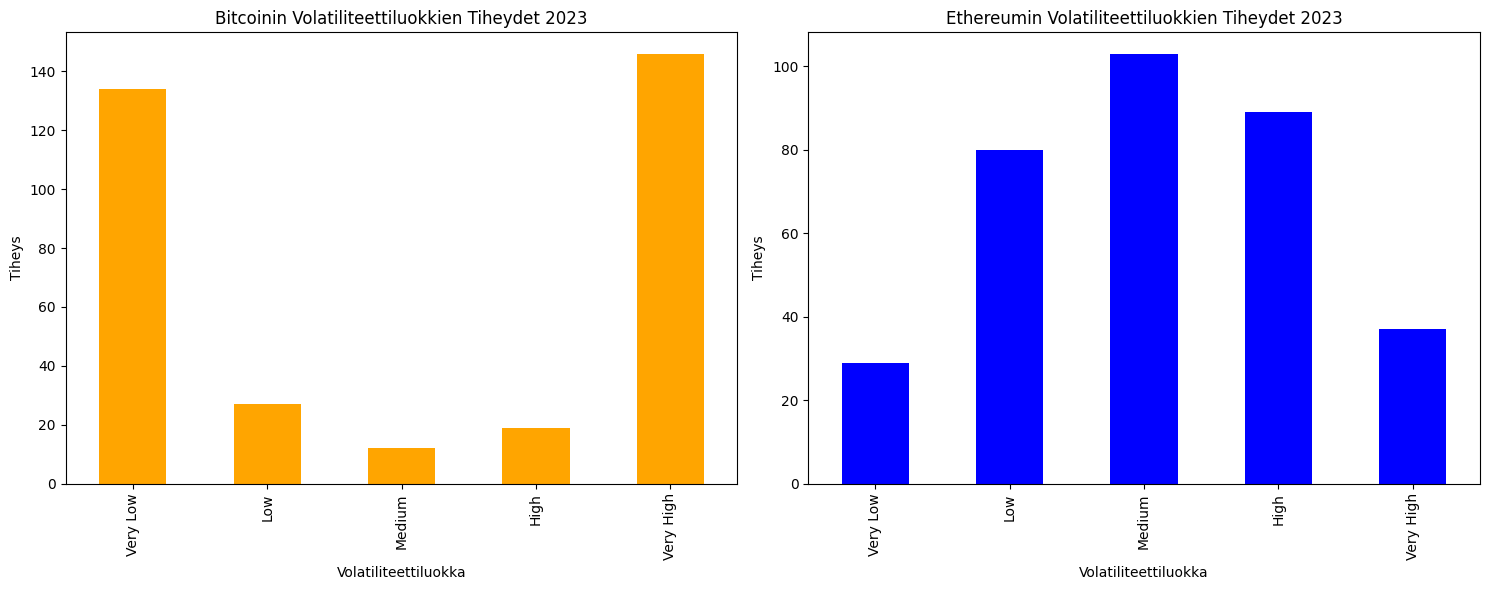

In [273]:
# Esimerkki funktioiden käytöstä
bins = [-np.inf, -50, -10, 10, 50, np.inf]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Luodaan syvät kopiot (deep copy) rajoitetusta datasta
btc_2023_copy = btc_2023.copy()
eth_2023_copy = eth_2023.copy()

# Lasketaan volatiliteettiluokkien tiheydet vuodelle 2023 käyttäen kopioita
btc_volatility_counts = laske_volatiliteetti(btc_2023_copy, bins, labels)
eth_volatility_counts = laske_volatiliteetti(eth_2023_copy, bins, labels)

# Luodaan pylväsdiagrammit
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
volatiliteetti_2023(btc_volatility_counts, 'Bitcoinin Volatiliteettiluokkien Tiheydet 2023', 'orange', axes[0])
volatiliteetti_2023(eth_volatility_counts, 'Ethereumin Volatiliteettiluokkien Tiheydet 2023', 'blue', axes[1])

plt.tight_layout()
plt.show()

Pylväsdiagrammit kuvastaa Bitcoinin ja Ethereumin päivittäisten hintamuutosten volatiliteettia vuonna 2023.

Korkea volatiliteetti, kuten Bitcoinissa havaittu, tarkoittaa suurempaa riskiä, mutta mahdollisesti myös suurempia tuottoja. Sijoittajien tulisi harkita tätä valitessaan sijoitusstrategioitaan.

Ethereum, toisaalta, näyttää vakaammalta, mikä saattaa houkutella toisenlaisia sijoittajia, jotka etsivät vähemmän heilahtelevia sijoituskohteita.

## Bitcoin halving

Bitcoin halving (puoliintuminen) on tapahtuma, jossa uusien bitcoinin tarjonta putoaa 50 prosenttia. Ensimmäinen Bitcoin halving tapahtui marraskuussa 2012. Halving on Bitcoinin koodiin ohjelmoitu tapahtuma, joka linkittyy vahvasti louhintaan. 

#### Miten Bitcoin Halving Toimii?

Halving tapahtuu noin neljän vuoden välein. Halving pitää huolta siitä, että bitcoinien liikkeelle laskettu määrä ei koskaan ylitä 21 miljoonaa kappaletta. Seuraava Bitcoin halving nähdään huhtikuussa 2024. Bitcoinin perustamishetkellä (2009) louhijat saivat palkkioiksi peräti 50 bitcoinia per lohko. Lohkopalkkio on puolitettu tämän jälkeen kolme kertaa: 50 BTC -> 25 BTC -> 12,5 BTC -> 6,25 BTC.

#### Aikajana

Yhteensä halving-tapahtumia nähdään 32 kappaletta, jonka jälkeen kaikki 21 miljoonaa bitcoinia on louhittu. Viimeinen halving tapahtuu noin vuonna 2140.

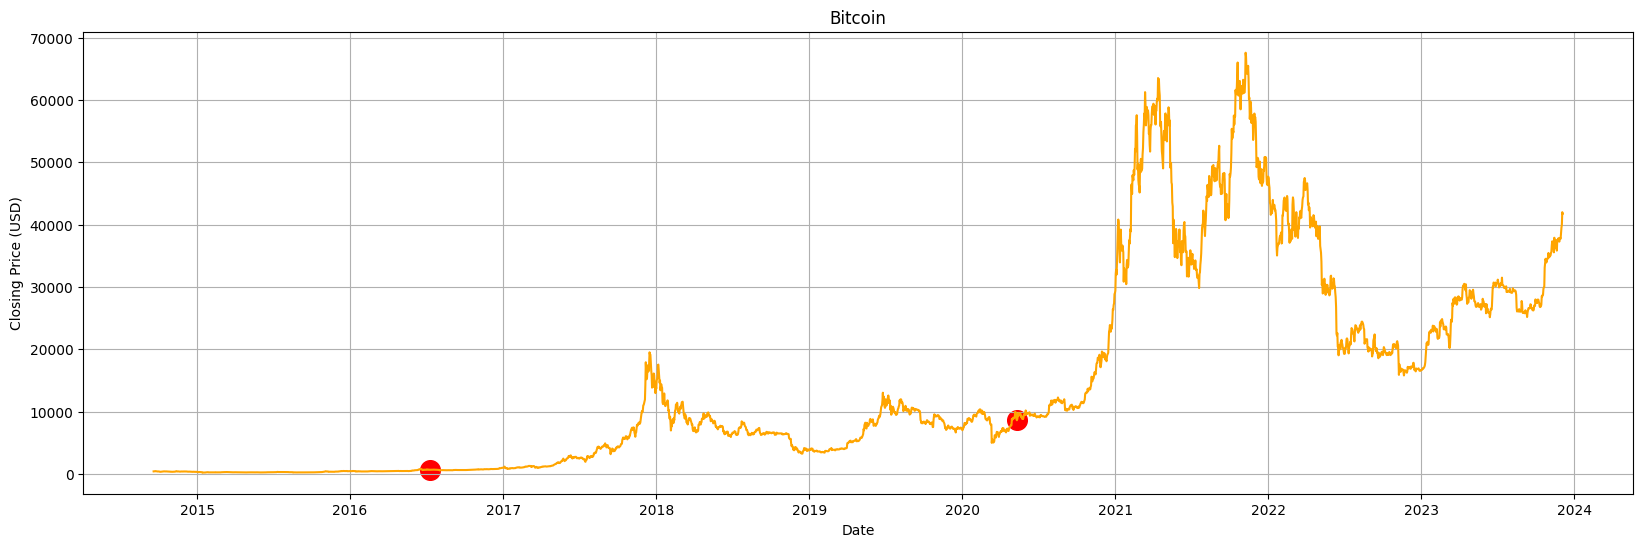

In [274]:
# Määritä halvingin päivämäärät datetime-tyypiksi
halving_dates = [pd.to_datetime("2012-11-28"), pd.to_datetime("2016-07-09"), pd.to_datetime("2020-05-11")]

# Bitcoinin hintakehityksen kaavio
plt.figure(figsize=(20, 6))
plt.plot(bitcoin_data["Close"], label="Bitcoin", color="orange")

# Lisää ympyrät halvingin päivämäärille
for date in halving_dates:
    if date in bitcoin_data.index:
        plt.scatter(date, bitcoin_data.loc[date, "Close"], color="red", s=200)

plt.title("Bitcoin")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.show()

## Halvingin vaikutukset Bitcoinin hintaan

Bitcoin-halvingilla on merkittäviä vaikutuksia koko Bitcoinin hintaan. Halvingit ovat yksi puhutuimmista tapahtumista kryptovaluuttojen maailmassa.

On tärkeää muistaa että historiallinen kehitys **_ei ole tae tulevasta_**, mutta Bitcoinin kurssi on tehnyt merkittäviä liikkeitä edellisten puoliintumisten jälkeen kuten:

- Vuoden 2016 halvingia seurasi valtava kryptovaluuttabuumi vuonna 2017
- Vuoden 2020 halvingin jälkeen nähtiin merkittävä nousumarkkina vuonna 2021

## Bitcoinin suhde yhdysvaltain dollariin


## Vuodet 2024 - 2025

Vaikka Bitcoin on käyttäytynyt tietyllä tavoin historiassa, kurssikehitys voi olla täysin erilaista tulevaisuudessa. Bitcoin on muuttunut valtavasti sijoitusluokkana sen alkuvuosista.
- Bitcoinin markkina-arvo on nyt merkittävästi korkeampi kuin aiempien halvingien aikaan, mikä tekee kurssin noususta vaikeampaa.
- Bitcoinin kursseja on ohjannut viime vuosina keskuspankkien toiminta ja osakemarkkinan liikkeet.

Halving tapahtuu, kun Bitcoinin lohkoketjuun on louhittu lohko numero 840.000. Vuoden 2024 puoliintumisessa lohkopalkkio pienenee 6,25 bitcoinista 3,125 bitcoiniin.

Vuonna 2024 nähdään todennäköisesti keskuspankkien siirtyminen kohti löysempää rahapolitiikkaa. Ohjauskorot kääntyvät laskuun, ja globaali likviditeetti alkaa kasvaa.  Todennäköisesti muutos nähdään -24 loppupuolella. Tämä johtaisi **_todennäköisesti_** nousuun myös Bitcoinin kurssissa.